In [1]:
import pandas as pd
import numpy as np

In [2]:
# Reading data into a DataFrame
data_1 = pd.read_csv('marketing_customer_analysis.csv')
display(data_1.head())
data_1.shape

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


(10910, 26)

In [3]:
#2 Standardize header names.
# employment_status  sales_channel
# Make them all lower case, and separate each word with underscore

In [4]:
#Standardize header names.
#get all columns lowered
cols = []
for column in data_1.columns:
    cols.append(column.lower())
data_1.columns = cols
cols
data_1.columns
#get all columns without spaces
data_1 = data_1.rename(columns={'unnamed: 0':'unnamed','customer lifetime value':'customer_lifetime_value',
                                'effective to date':'effective_to_date',
                                'location code':'location_code',
                                'marital status' : 'marital_status',
                                'monthly premium auto':'monthly_premium_auto',
                                'months since last claim':'months_since_last_claim',
                                'months since policy inception':'months_since_policy_inception',
                                'number of open complaints':'number_of_open_complaints',
                                'number of policies':'number_of_policies', 'policy type':'policy_type',
                                'renew offer type':'renew_offer_type',
                                'sales channel':'sales_channel', 'total claim amount':'total_claim_amount',
                                'vehicle class':'vehicle_class',
                                'vehicle size':'vehicle_size','vehicle type':'vehicle_type'
                               })





In [5]:
display(data_1)


,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [6]:
#Which columns are numerical?


data_1._get_numeric_data()

,unnamed,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,0,4809.216960,48029,61,7.0,52,0.0,9,292.800000
1,1,2228.525238,0,64,3.0,26,0.0,1,744.924331
2,2,14947.917300,22139,100,34.0,31,0.0,2,480.000000
3,3,22332.439460,49078,97,10.0,3,0.0,2,484.013411
4,4,9025.067525,23675,117,NaN,31,NaN,7,707.925645
...,...,...,...,...,...,...,...,...,...
10905,10905,15563.369440,0,253,NaN,40,NaN,7,1214.400000
10906,10906,5259.444853,61146,65,7.0,68,0.0,6,273.018929
10907,10907,23893.304100,39837,201,11.0,63,0.0,2,381.306996
10908,10908,11971.977650,64195,158,0.0,27,4.0,6,618.288849


In [7]:
#Which columns are categorical?

data_1.select_dtypes(include=['object']).columns.tolist()

['customer',
 'state',
 'response',
 'coverage',
 'education',
 'effective_to_date',
 'employmentstatus',
 'gender',
 'location_code',
 'marital_status',
 'policy_type',
 'policy',
 'renew_offer_type',
 'sales_channel',
 'vehicle_class',
 'vehicle_size',
 'vehicle_type']

In [8]:
#Check and deal with NaN values.

data_1.isna().sum()


unnamed                             0
customer                            0
state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

In [9]:
data_1.isnull().values.any()

True

In [10]:
round(data_1.isna().sum()/len(data_1),4)*100  # shows the percentage of null values in a column
nulls_df = pd.DataFrame(round(data_1.isna().sum()/len(data_1),4)*100)
nulls_df
nulls_df = nulls_df.reset_index()
nulls_df
nulls_df.columns = ['header_name', 'percent_nulls']
nulls_df



,header_name,percent_nulls
0,unnamed,0.00
1,customer,0.00
2,state,5.78
3,customer_lifetime_value,0.00
4,response,5.78
5,coverage,0.00
6,education,0.00
7,effective_to_date,0.00
8,employmentstatus,0.00
9,gender,0.00


In [50]:
#vehicle_type has over 50% null values, but the rest of the values are "A"
data_1["vehicle_type"].value_counts()


#I'll assume "vehicle_type" is for Automatic or Manual, so instead of dropping the column,
#let's change all the null values under the "vehicle_type" column to "B"
data_1['vehicle_type'] = data_1['vehicle_type'].fillna("B")
data_1


#columns_drop = nulls_df[nulls_df['percent_nulls']>50]['header_name']  # dummy case with 3
#print(columns_drop.values)



,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,month_dt
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,B,2,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,B,1,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,B,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,B,2,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,2


In [20]:
#now let's check null values in rows

# Replacing/imputing null values
data_1[data_1['state'].isna()==True]
# checking rows that are null based on a specific column

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
5,5,HO81102,NaN,4745.181764,NaN,Basic,High School or Below,2/14/11,Employed,M,...,0.0,7,Personal Auto,Personal L3,Offer1,Agent,292.800000,Four-Door Car,Medsize,A
11,11,GE63585,NaN,2420.711888,NaN,Basic,Bachelor,2/7/11,Employed,M,...,0.0,1,Corporate Auto,Corporate L3,Offer1,Call Center,199.551735,Two-Door Car,Medsize,NaN
58,58,BR69566,NaN,14019.833140,NaN,Basic,College,2/18/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer4,Call Center,469.882367,Two-Door Car,Small,NaN
62,62,UF44021,NaN,2108.493744,NaN,Basic,Bachelor,1/2/11,Unemployed,M,...,0.0,1,Personal Auto,Personal L2,Offer1,Agent,351.856810,Two-Door Car,Medsize,NaN
126,126,TE60343,NaN,4716.264294,NaN,Basic,High School or Below,2/25/11,Employed,M,...,1.0,3,Corporate Auto,Corporate L3,Offer2,Agent,292.800000,Four-Door Car,Medsize,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10837,10837,IJ40048,NaN,4978.950257,NaN,Basic,Bachelor,1/31/11,Employed,M,...,0.0,4,Corporate Auto,Corporate L2,Offer1,Branch,221.241837,Four-Door Car,Medsize,A
10849,10849,SO38188,NaN,5308.617246,NaN,Extended,Bachelor,1/24/11,Employed,M,...,0.0,1,Special Auto,Special L2,Offer1,Agent,652.800000,SUV,Medsize,NaN
10874,10874,PD52748,NaN,10036.536340,NaN,Extended,High School or Below,2/12/11,Unemployed,F,...,1.0,8,Personal Auto,Personal L3,Offer1,Call Center,1353.289060,SUV,Medsize,NaN
10894,10894,EX63393,NaN,6314.492009,NaN,Extended,Master,2/27/11,Employed,F,...,0.0,6,Personal Auto,Personal L1,Offer3,Agent,374.400000,Four-Door Car,Small,NaN


In [ ]:
#Above means that there are 631 null rows under the "state" column

In [21]:
data_1[data_1['coverage'].isna()==True]


,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


In [22]:
data_1[data_1['gender'].isna()==True]
#there are 0 rows where gender was null

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type


In [23]:
data_1[data_1['vehicle_size'].isna()==True]
#displaying all the rows that have a null value under the vehicle_size column

,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
87,87,ZH92587,Oregon,8126.766397,No,Basic,College,2/22/11,Disabled,F,...,NaN,3,Personal Auto,Personal L3,Offer1,Agent,513.600000,NaN,NaN,NaN
88,88,CJ51511,Arizona,13466.920710,Yes,Basic,High School or Below,2/23/11,Disabled,F,...,NaN,2,Corporate Auto,Corporate L3,Offer2,Agent,571.200000,NaN,NaN,NaN
89,89,ME37450,Arizona,5210.348372,No,Basic,Bachelor,1/4/11,Employed,M,...,0.0,5,Special Auto,Special L2,Offer1,Agent,37.960537,NaN,NaN,A
97,97,CA22248,Oregon,2505.420430,No,Basic,Master,2/14/11,Employed,F,...,0.0,1,Personal Auto,Personal L3,Offer2,Branch,46.278027,NaN,NaN,A
148,148,HB24005,California,2347.048112,No,Basic,College,2/2/11,Employed,M,...,1.0,1,Personal Auto,Personal L1,Offer1,Agent,244.269407,NaN,NaN,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10852,10852,KZ80424,Washington,8382.478392,Yes,Basic,Bachelor,1/27/11,Employed,M,...,0.0,2,Personal Auto,Personal L2,Offer2,Call Center,791.878042,NaN,NaN,A
10860,10860,GA79817,Arizona,2369.111588,No,Basic,Bachelor,2/5/11,Unemployed,M,...,0.0,1,Corporate Auto,Corporate L2,Offer3,Call Center,468.000000,NaN,NaN,NaN
10879,10879,FK95213,California,18611.453560,No,Extended,Master,1/16/11,Employed,F,...,0.0,7,Personal Auto,Personal L3,Offer2,Web,1021.654003,NaN,NaN,NaN
10883,10883,FD64348,Oregon,22563.618380,No,Basic,High School or Below,1/17/11,Employed,M,...,3.0,2,Personal Auto,Personal L3,Offer4,Branch,1.687291,NaN,NaN,A


In [38]:
#6 Datetime format - Extract the months from the dataset and store in a separate column. 
#Then filter the data to show only the information for the first quarter , ie. January, 
#February and March.
#Hint: If data from March does not exist, consider only January and February.

import time
from datetime import date
data_1['month'] = pd.DatetimeIndex(data_1['effective_to_date']).month
data_1['month'].unique()
data_1[(data_1['month']==1) | (data_1['month']==2) | (data_1['month']==3)]


array([2, 1])

In [25]:
data_1["effective_to_date"].dtypes

dtype('O')

In [34]:
data_1["effective_to_date"] = pd.to_datetime(data_1["effective_to_date"])
data_1["month_dt"] = data_1["effective_to_date"].dt.month


,unnamed,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month,month_dt
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,...,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN,2,2
1,1,KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,...,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN,1,1
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,...,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2,2
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,...,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1,1
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,...,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,...,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1,1
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,...,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1,1
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,...,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN,2,2
10908,10908,WA60547,California,11971.977650,No,Premium,College,2011-02-13,Employed,F,...,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A,2,2


In [37]:
data_1["month"].value_counts()

1    5818
2    5092
Name: month, dtype: int64

In [40]:
data_1["vehicle_type"].value_counts()

A    5428
Name: vehicle_type, dtype: int64

,count,mean,std,min,25%,50%,75%,max
unnamed,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [58]:
#start of Day 3 Customer Analysis Round 3
#1 Show DataFrame info.

data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10910 entries, 0 to 10909
Data columns (total 28 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   unnamed                        10910 non-null  int64         
 1   customer                       10910 non-null  object        
 2   state                          10279 non-null  object        
 3   customer_lifetime_value        10910 non-null  float64       
 4   response                       10279 non-null  object        
 5   coverage                       10910 non-null  object        
 6   education                      10910 non-null  object        
 7   effective_to_date              10910 non-null  datetime64[ns]
 8   employmentstatus               10910 non-null  object        
 9   gender                         10910 non-null  object        
 10  income                         10910 non-null  int64         
 11  location_code  

In [54]:
#2 Describe DataFrame.
data_1.describe().T

,count,mean,std,min,25%,50%,75%,max
unnamed,10910.0,5454.500000,3149.590053,0.000000,2727.250000,5454.500000,8181.750000,10909.000000
customer_lifetime_value,10910.0,8018.241094,6885.081434,1898.007675,4014.453113,5771.147235,8992.779137,83325.381190
income,10910.0,37536.284785,30359.195670,0.000000,0.000000,33813.500000,62250.750000,99981.000000
monthly_premium_auto,10910.0,93.196059,34.442532,61.000000,68.000000,83.000000,109.000000,298.000000
months_since_last_claim,10277.0,15.149071,10.080349,0.000000,6.000000,14.000000,23.000000,35.000000
months_since_policy_inception,10910.0,48.091934,27.940675,0.000000,24.000000,48.000000,71.000000,99.000000
number_of_open_complaints,10277.0,0.384256,0.912457,0.000000,0.000000,0.000000,0.000000,5.000000
number_of_policies,10910.0,2.979193,2.399359,1.000000,1.000000,2.000000,4.000000,9.000000
total_claim_amount,10910.0,434.888330,292.180556,0.099007,271.082527,382.564630,547.200000,2893.239678
month,10910.0,1.466728,0.498915,1.000000,1.000000,1.000000,2.000000,2.000000


In [56]:
#Step 3 Show a plot of the total number of responses
#Hone in on responses column and examine data

data_1["response"].value_counts()

No     8813
Yes    1466
Name: response, dtype: int64

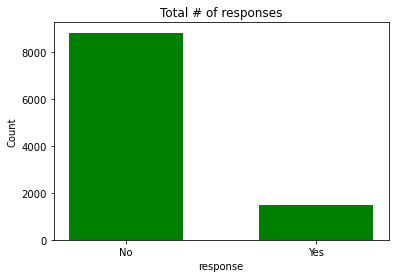

In [71]:
#According to above, all responses were either yes or no, there are no nulls. Yay!
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

count = data_1["response"].value_counts()

yes = count['Yes']
no = count['No']

plt.bar(['No','Yes'],[no, yes], color = 'green',  width = 0.6)
plt.xlabel("response")
plt.ylabel("Count")
plt.title("Total # of responses")
plt.show()


In [64]:
#sns.displot(data = file1, x='income', bins=20, hue='response_rate', multiple='stack')
#plt.show()    <<this is the solution to one later question

In [ ]:
#4 Show a plot of the response rate by the sales channel.
#So response could be Yes or No

data_1["response"].value_counts()


In [73]:
data_1["sales_channel"].value_counts()
#so for every sales channel, the total is divided into Y or N

Agent          4121
Branch         3022
Call Center    2141
Web            1626
Name: sales_channel, dtype: int64

<AxesSubplot:xlabel='sales_channel', ylabel='count'>

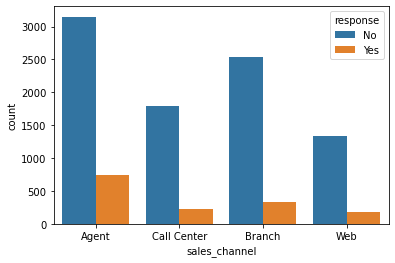

In [79]:
sns.countplot(data=data_1, x="sales_channel",hue= 'response')

In [86]:
#5 Show a plot of the response rate by the total claim amount.

data_1["response"].value_counts()
max_tcm = data_1["total_claim_amount"].max()
min_tcm = data_1["total_claim_amount"].min()

print(max_tcm)
print(min_tcm)


2893.239678
0.099007


In [ ]:
#6 Show a plot of the response rate by income.

# Day 4 Lab 1

In [ ]:
#Check the data types of the columns. 
#Get the numeric data into dataframe called numerical and categorical columns in a 
#dataframe called categoricals. (You can use np.number and np.object to select the 
#numerical data types and categorical data types respectively)

In [96]:
data_1.dtypes

unnamed                                   int64
customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                 float64
months_since_policy_inception             int64
number_of_open_complaints               float64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                        

In [117]:
numerical_df = data_1.select_dtypes(include=np.number)
print(numerical_df)
#numerical variables are :
#income
#monthly_premium_auto
#months_since_last_claim
#number_of_open_complaints
#total_claim_amount
#months_since_last_claim
#number_of_policies
#months_since_policy_inception


       unnamed  customer_lifetime_value  income  monthly_premium_auto  \
0            0              4809.216960   48029                    61   
1            1              2228.525238       0                    64   
2            2             14947.917300   22139                   100   
3            3             22332.439460   49078                    97   
4            4              9025.067525   23675                   117   
...        ...                      ...     ...                   ...   
10905    10905             15563.369440       0                   253   
10906    10906              5259.444853   61146                    65   
10907    10907             23893.304100   39837                   201   
10908    10908             11971.977650   64195                   158   
10909    10909              6857.519928       0                   101   

       months_since_last_claim  months_since_policy_inception  \
0                          7.0                            

In [101]:
categorical_df = data_1.select_dtypes(include=object)


In [ ]:
#Now we will try to check the normality of the numerical variables visually
#Use seaborn library to construct distribution plots for the numerical variables
#Use Matplotlib to construct histograms
#Do the distributions for different numerical variables look like a normal distribution

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

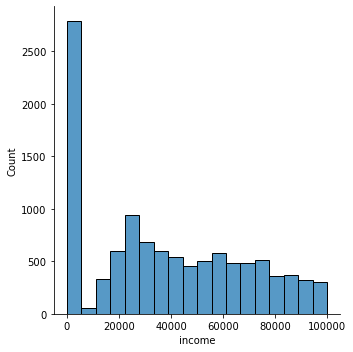

In [114]:
sns.displot(numerical_df, x="income")
plt.show()

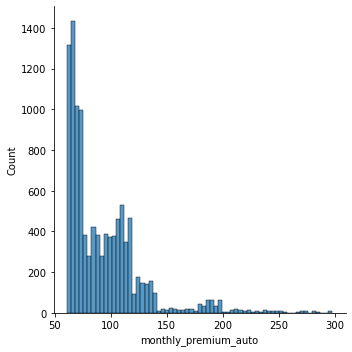

In [115]:
sns.displot(numerical_df, x="monthly_premium_auto")
plt.show()

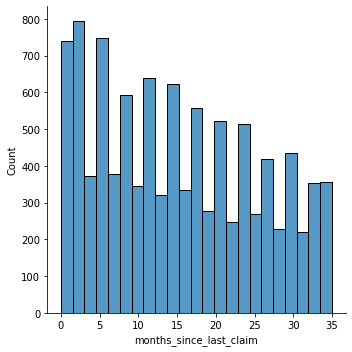

In [112]:
sns.displot(numerical_df, x="months_since_last_claim")

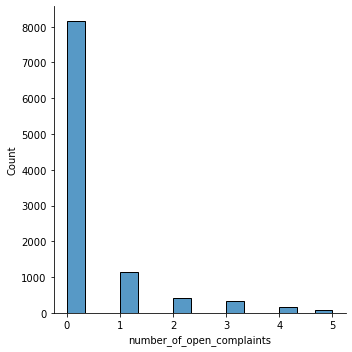

In [113]:
sns.displot(numerical_df, x='number_of_open_complaints')

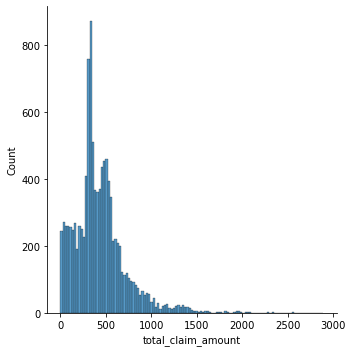

In [119]:
sns.displot(numerical_df, x="total_claim_amount")
plt.show()

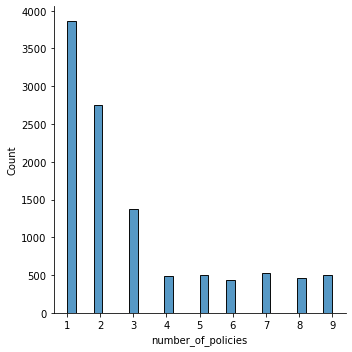

In [121]:
sns.displot(numerical_df, x="number_of_policies")
plt.show()

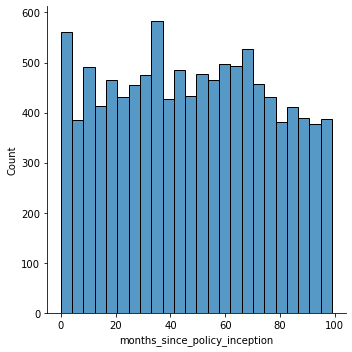

In [122]:
sns.displot(numerical_df, x="months_since_policy_inception")
plt.show()

In [ ]:
#Use Matplotlib to construct histograms
#income
#monthly_premium_auto
#months_since_last_claim
#number_of_open_complaints
#total_claim_amount
#months_since_last_claim
#number_of_policies
#months_since_policy_inception

In [143]:
numerical_df['income'].describe()
#min - 0 and max = about 100,000-- so 10 bins of 10,000 each?

count    10910.000000
mean     37536.284785
std      30359.195670
min          0.000000
25%          0.000000
50%      33813.500000
75%      62250.750000
max      99981.000000
Name: income, dtype: float64

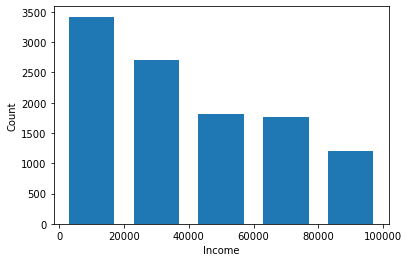

In [138]:
x = numerical_df['income']
plt.hist(x, bins = 5, rwidth=0.7)

plt.ylabel("Count")
plt.xlabel("Income")
plt.show()

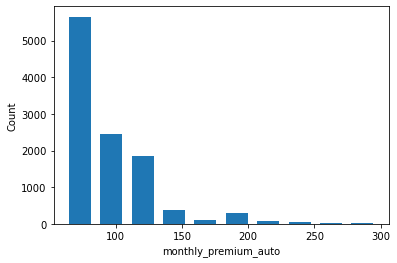

In [146]:
#monthly_premium_auto

x = numerical_df['monthly_premium_auto']
plt.hist(x, rwidth=0.7)

plt.ylabel("Count")
plt.xlabel("monthly_premium_auto")
plt.show()

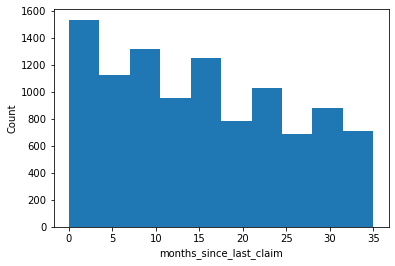

In [151]:
#months_since_last_claim

x = numerical_df['months_since_last_claim']
plt.hist(x)

plt.ylabel("Count")
plt.xlabel("months_since_last_claim")
plt.show()

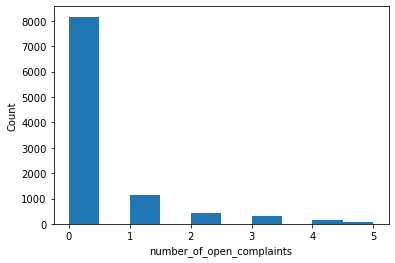

In [150]:
#number_of_open_complaints

x = numerical_df['number_of_open_complaints']
plt.hist(x)

plt.ylabel("Count")
plt.xlabel("number_of_open_complaints")
plt.show()

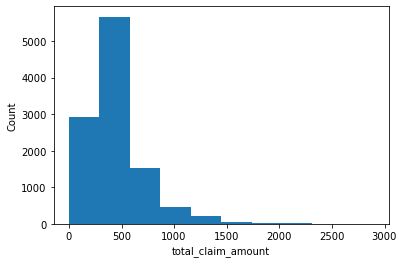

In [152]:
#total_claim_amount
x = numerical_df['total_claim_amount']
plt.hist(x)

plt.ylabel("Count")
plt.xlabel("total_claim_amount")
plt.show()

In [ ]:
#Do the distributions for different numerical variables look like a normal distribution?
#A probability distribution that is symmetric about the mean,
#showing that data near the mean are more frequent in occurrence than data far from the mean. 
#In graph form, normal distribution will appear as a bell curve.


#No, the distributions for numerical variables don't look like a normal distribution. It's not a bell curve.

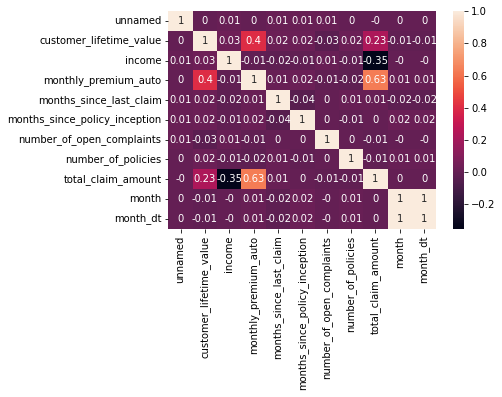

In [154]:
#For the numerical variables, check the multicollinearity between the features. 
#Please note that we will use the column total_claim_amount later as the target variable.

correlations_matrix = round(numerical_df.corr(),2)
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [ ]:
#Drop one of the two features that show a high correlation between them (greater than 0.9). 
#Write code for both the correlation matrix and for seaborn heatmap. 
#If there is no pair of features that have a high correlation, then do not drop any features

#None of the pairs have a high correlation so won't drop any pairs

# Day 4 Lab 2